In [37]:
pip install tensorflow


  Using cached tensorflow-2.12.0-cp310-cp310-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.12.0-cp310-cp310-win_amd64.whl (272.8 MB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.12.0-py3-none-any.whl (5.6 MB)
  Using cached jax-0.4.6.tar.gz (1.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached grpcio-1.51.3-cp310-cp310-win_amd64.whl (3.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached h5py-3.8.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.16.3-py2.py3-none-any.whl (177 kB)
  Using cached cachetools-5.3.0-py3-none-any.whl (9.3 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Created wheel for jax: filename=jax-0.


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
pip install TensorFlow 

In [1]:
import numpy as mp
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [2]:
train_samples=[]
train_lables=[]

In [3]:
#Creating a data set

for i in range(50):
    #for 5% infected below 65 yrs
    train_samples.append(randint(13,65))
    train_lables.append(1)
    
    #for 5% not infected above 65yrs
    train_samples.append(randint(65,100))
    train_lables.append(0)
    
for i in range(1000):
    #for 95% infected above 65yrs
    train_samples.append(randint(65,100))
    train_lables.append(1)
    
    #for 95% not infected below 65yrs
    train_samples.append(randint(13,65))
    train_lables.append(0)
    

In [4]:
len(train_lables)

2100

In [5]:
train_samples=mp.array(train_samples)
train_lables=mp.array(train_lables)
train_samples,train_lables=shuffle(train_samples,train_lables)

In [6]:
print(train_lables)

[0 1 1 ... 1 0 1]


In [7]:
train_lables

array([0, 1, 1, ..., 1, 0, 1])

In [8]:
scaler=MinMaxScaler(feature_range=(0,1))
scalered_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))

In [9]:
scalered_train_samples

array([[0.        ],
       [0.81609195],
       [0.82758621],
       ...,
       [0.68965517],
       [0.20689655],
       [0.94252874]])

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [37]:
physical_devices=tf.config.experimental.list_physical_devices('GPU')
print('Num of GPUs Available:',len(physical_devices) )
tf.config.experimental.set_memory_growth(physical_devices[0],True)

Num of GPUs Available: 0


IndexError: list index out of range

In [38]:
model=Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [43]:
model.fit(x=scalered_train_samples,y=train_lables,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 2s - loss: 0.6809 - accuracy: 0.5540 - val_loss: 0.6695 - val_accuracy: 0.6905 - 2s/epoch - 12ms/step
Epoch 2/30
189/189 - 1s - loss: 0.6668 - accuracy: 0.6635 - val_loss: 0.6521 - val_accuracy: 0.7667 - 625ms/epoch - 3ms/step
Epoch 3/30
189/189 - 1s - loss: 0.6509 - accuracy: 0.7317 - val_loss: 0.6331 - val_accuracy: 0.8000 - 698ms/epoch - 4ms/step
Epoch 4/30
189/189 - 1s - loss: 0.6338 - accuracy: 0.7434 - val_loss: 0.6122 - val_accuracy: 0.8238 - 609ms/epoch - 3ms/step
Epoch 5/30
189/189 - 1s - loss: 0.6149 - accuracy: 0.7630 - val_loss: 0.5899 - val_accuracy: 0.8238 - 633ms/epoch - 3ms/step
Epoch 6/30
189/189 - 1s - loss: 0.5943 - accuracy: 0.7725 - val_loss: 0.5667 - val_accuracy: 0.8476 - 689ms/epoch - 4ms/step
Epoch 7/30
189/189 - 1s - loss: 0.5719 - accuracy: 0.7974 - val_loss: 0.5415 - val_accuracy: 0.8476 - 770ms/epoch - 4ms/step
Epoch 8/30
189/189 - 1s - loss: 0.5483 - accuracy: 0.8175 - val_loss: 0.5154 - val_accuracy: 0.8571 - 613ms/epoch - 3ms/step
Ep

# preprocssing test data

In [77]:
test_samples=[]
test_lables=[]

In [78]:
#Creating a data set

for i in range(10):
    #for 5% infected below 65 yrs
    test_samples.append(randint(13,65))
    test_lables.append(1)
    
    #for 5% not infected above 65yrs
    test_samples.append(randint(65,100))
    test_lables.append(0)
    
for i in range(200):
    #for 95% infected above 65yrs
    test_samples.append(randint(65,100))
    test_lables.append(1)
    
    #for 95% not infected below 65yrs
    test_samples.append(randint(13,65))
    test_lables.append(0)
    

In [79]:
test_samples=mp.array(test_samples)
test_lables=mp.array(test_lables)
test_samples,test_lables=shuffle(test_samples,test_lables)

In [80]:
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

# predicting

In [81]:
predictions=model.predict(x=scaled_test_samples,batch_size=10,verbose=0)

In [82]:
for i in predictions:
    print(i)
    

[0.03518904 0.96481097]
[0.48982066 0.5101793 ]
[0.2883628 0.7116372]
[0.77785605 0.22214396]
[0.4099414  0.59005857]
[0.94996846 0.05003158]
[0.04710147 0.95289856]
[0.9424768  0.05752322]
[0.94996846 0.05003158]
[0.94996846 0.05003158]
[0.92688453 0.07311553]
[0.857216 0.142784]
[0.03128613 0.9687139 ]
[0.09070016 0.9092998 ]
[0.17504035 0.82495964]
[0.7383788  0.26162118]
[0.2667496 0.7332504]
[0.62208766 0.3779124 ]
[0.2667496 0.7332504]
[0.436254 0.563746]
[0.05599822 0.94400173]
[0.03318223 0.9668178 ]
[0.62208766 0.3779124 ]
[0.07448944 0.9255105 ]
[0.4099414  0.59005857]
[0.94996846 0.05003158]
[0.13310236 0.86689764]
[0.20838928 0.79161066]
[0.03318223 0.9668178 ]
[0.38413453 0.61586547]
[0.9371694  0.06283063]
[0.9463609  0.05363911]
[0.94996846 0.05003158]
[0.3589639  0.64103615]
[0.48982066 0.5101793 ]
[0.14604369 0.85395634]
[0.9472317 0.0527683]
[0.06810842 0.93189156]
[0.07448944 0.9255105 ]
[0.05599822 0.94400173]
[0.24619584 0.75380415]
[0.6470841 0.3529159]
[0.1750403

In [83]:
rounded_predictions=mp.argmax(predictions,axis=-1)

In [84]:
for i in rounded_predictions:
    print(i)

1
1
1
0
1
0
1
0
0
0
0
0
1
1
1
0
1
0
1
1
1
1
0
1
1
0
1
1
1
1
0
0
0
1
1
1
0
1
1
1
1
0
1
1
0
1
0
1
0
1
0
1
0
1
1
0
1
0
1
0
0
0
0
0
0
0
1
0
1
0
1
0
0
0
1
0
1
1
1
1
1
0
0
1
1
0
1
0
1
1
0
0
1
0
0
1
1
0
0
1
1
1
1
0
1
1
1
0
0
1
1
0
1
0
0
1
1
1
1
1
1
0
1
0
0
1
0
0
0
1
0
1
1
0
0
0
0
1
0
0
0
0
0
0
1
1
0
1
0
1
1
0
1
1
1
1
0
0
0
1
0
1
1
0
1
1
0
1
1
1
1
0
0
1
0
0
1
0
1
1
0
0
0
1
1
1
0
1
1
0
0
0
0
0
0
1
1
1
0
1
0
0
1
1
0
1
0
0
1
0
1
1
1
1
1
0
0
0
0
1
0
1
0
1
0
1
1
0
1
0
1
1
1
0
1
0
1
0
0
1
1
1
1
1
1
1
1
0
0
1
1
0
1
1
1
0
1
0
0
0
0
0
0
1
1
1
1
0
0
1
1
0
1
1
0
0
0
1
0
1
0
0
1
1
0
0
0
1
0
0
0
0
0
0
1
1
0
0
0
1
1
1
1
1
1
0
0
0
0
0
1
1
1
1
1
0
0
0
0
0
1
1
0
0
1
1
1
1
1
1
1
1
1
0
0
1
1
1
1
1
1
1
1
0
0
0
0
0
1
0
0
0
1
1
0
1
1
0
0
1
0
1
1
1
0
1
1
0
1
1
1
0
0
0
1
1
1
1
1
0
0
0
0
1
0
1
1
0
1
1
1
1
0
0
0
0
1
1
1
1
0
0
1
1
0
1
0
1
1
0
1
1
1
1
0
1
1
1
0
0


# Confusion Metrix

In [85]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [86]:
cm = confusion_matrix(y_true=test_lables, y_pred=rounded_predictions)

In [87]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = mp.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[183  27]
 [ 10 200]]


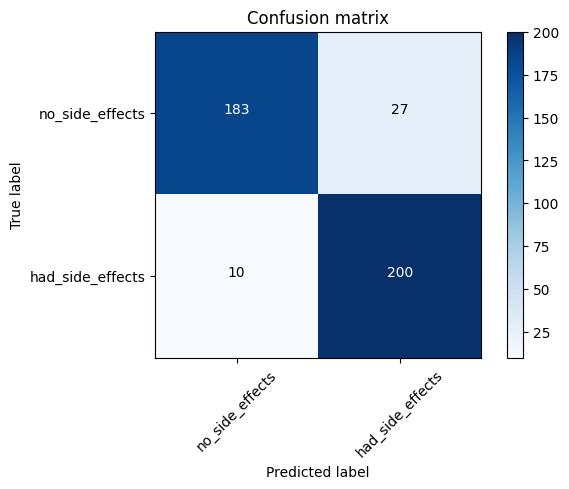

In [88]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,)

# Model summary

In [89]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# model.save()

In [95]:
import os.path
if os.path.isfile('models/medical_trail_model.h5') is False:
    model.save('models/medical_trail_model.h5')

In [96]:
from tensorflow.keras.models import load_model
new_model=load_model('models/medical_trail_model.h5')

In [97]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [99]:
new_model.get_weights()

[array([[-0.4232781 , -0.07951826,  0.5424448 ,  0.5987227 , -0.1787104 ,
         -0.47700804, -0.1372177 , -0.01800251, -0.56046367, -0.5899862 ,
         -0.43441623, -0.0171293 , -0.0468477 , -0.1168924 ,  0.36154068,
         -0.09675038]], dtype=float32),
 array([ 0.        ,  0.        , -0.07588739, -0.13937795,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.0680128 ,
         0.        ], dtype=float32),
 array([[ 1.34283662e-01,  1.14180863e-01,  3.37536663e-01,
         -3.23490292e-01, -2.19376445e-01, -2.21997485e-01,
         -1.33870184e-01, -1.51419967e-01,  1.14167124e-01,
          1.33735240e-01, -3.49460095e-01, -4.65318859e-02,
         -1.04833290e-01, -3.98545563e-02,  2.46311516e-01,
          6.05092943e-02,  2.61178523e-01, -2.06164762e-01,
         -2.16582954e-01, -1.82349175e-01, -6.81066513e-03,
          2.40808040e-01,  1.20037258e-01,  8.77016187e-02,
 

In [100]:
new_model.optimizer


# Model.to_json()

In [101]:
json_string=model.to_json()

In [102]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_1", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_3_input"}}, {"class_name": "Dense", "config": {"name": "dense_3", "trainable": true, "dtype": "float32", "batch_input_shape": [null, 1], "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_4", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "

In [103]:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)

In [104]:
model_architecture.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 32)                544       
                                                                 
 dense_5 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# saving model weights

In [105]:
import os.path
if os.path.isfile('models/my_model_weights.h5') is False:
    model.save_weights('models/my_model_weights.h5')

In [107]:
model2=Sequential([
    Dense(units=16,input_shape=(1,),activation='relu'),
    Dense(units=32,input_shape=(1,),activation='relu'),
    Dense(units=2,activation='softmax')
])

In [108]:
model2.load_weights('models/my_model_weights.h5')

In [109]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                32        
                                                                 
 dense_7 (Dense)             (None, 32)                544       
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [113]:
model2.get_weights()

[array([[-0.4232781 , -0.07951826,  0.5424448 ,  0.5987227 , -0.1787104 ,
         -0.47700804, -0.1372177 , -0.01800251, -0.56046367, -0.5899862 ,
         -0.43441623, -0.0171293 , -0.0468477 , -0.1168924 ,  0.36154068,
         -0.09675038]], dtype=float32),
 array([ 0.        ,  0.        , -0.07588739, -0.13937795,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.0680128 ,
         0.        ], dtype=float32),
 array([[ 1.34283662e-01,  1.14180863e-01,  3.37536663e-01,
         -3.23490292e-01, -2.19376445e-01, -2.21997485e-01,
         -1.33870184e-01, -1.51419967e-01,  1.14167124e-01,
          1.33735240e-01, -3.49460095e-01, -4.65318859e-02,
         -1.04833290e-01, -3.98545563e-02,  2.46311516e-01,
          6.05092943e-02,  2.61178523e-01, -2.06164762e-01,
         -2.16582954e-01, -1.82349175e-01, -6.81066513e-03,
          2.40808040e-01,  1.20037258e-01,  8.77016187e-02,
 